# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털 https://kosis.kr/index/index.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어서 미리 합침)
- 행렬전환

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

In [3]:
# font 설정 D2Coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [4]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.columns = ["category", "date", "internet", "mobile"]
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [5]:
print("수정전")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))
print("수정전")
print(ori['date'].tail())

수정전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정전
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [6]:
ori['date'] = pd.to_datetime(ori["date"], format = '%Y.%m')
ori.dtypes
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017-01-01,288391,133993
1,컴퓨터 및 주변기기,2017-02-01,329143,146200
2,컴퓨터 및 주변기기,2017-03-01,322089,151262
3,컴퓨터 및 주변기기,2017-04-01,251604,116675
4,컴퓨터 및 주변기기,2017-05-01,241871,109053


In [7]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category'] == '음식서비스'] # '컴퓨터 및 주변기기'
obj = ['컴퓨터 및 주변기기', '의복', '신발', '가방', '음식서비스', '음·식료품', '애완용품', '여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1973,음식서비스,2021-06-01,51466,1968130
633,가방,2021-10-01,56886,169479
1099,음·식료품,2020-08-01,384112,1169716
439,의복,2021-08-01,267773,809471
1694,여행 및 교통서비스,2022-03-01,255814,665783


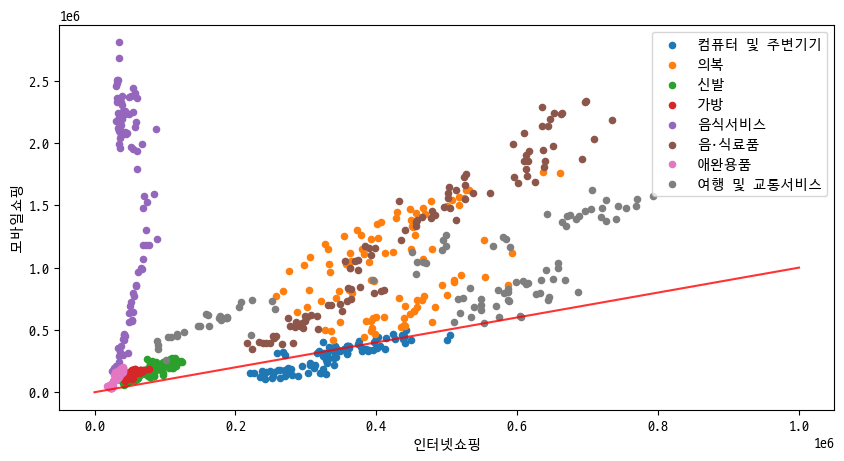

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
category = obj
for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 20, label = cate)

ax.set_xlabel("인터넷쇼핑")
ax.set_ylabel("모바일쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000], [0,1000000], 'r-', alpha=0.8)
plt.show()
# print(category_data, x_data, y_data)

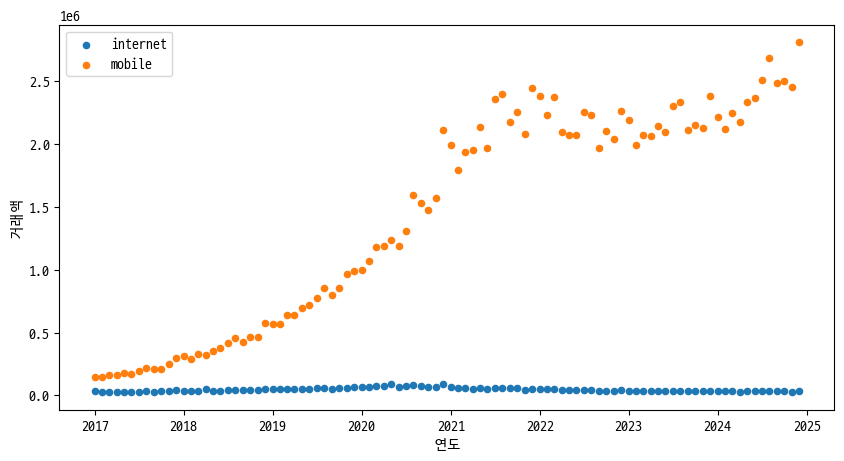

In [44]:
# 레벨1
# 전처리됨 데이터를 최소한으로 수정하여 다른 방향으로 인사이트 얻기
fig, ax = plt.subplots(figsize=(10,5))
intmob = ['internet', 'mobile']
category = intmob
for ran in category:
    category_data = ex1_data[ex1_data['category'] == obj[4]]
    # x_data = category_data['internet']
    # y_data = category_data['mobile']
    x_data = category_data['date']
    y_data = category_data[ran]
    ax.scatter(x_data, y_data, s = 20, label = ran)

ax.set_xlabel("연도")
ax.set_ylabel("거래액")
ax.legend(loc="best")
# ax.plot([0,1000000], [0,1000000], 'r-', alpha=0.8)
plt.show()
# print(category_data, x_data, y_data) 

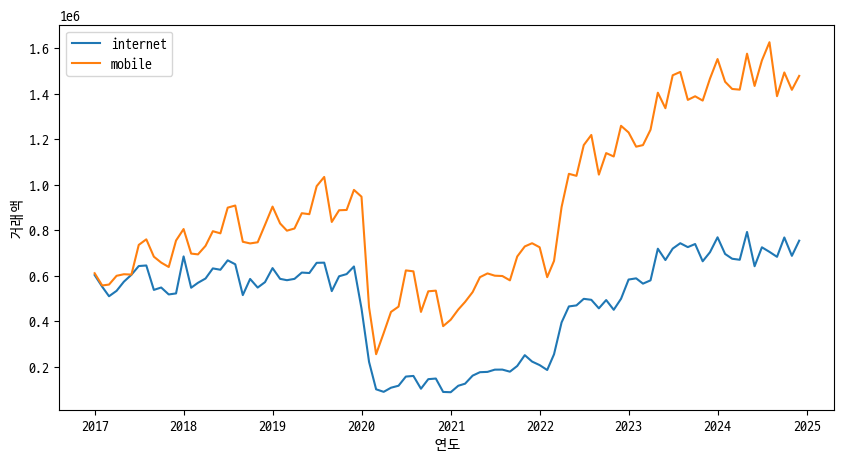

In [43]:
# 레벨1
# 전처리됨 데이터를 최소한으로 수정하여 다른 방향으로 인사이트 얻기
fig, ax = plt.subplots(figsize=(10,5))
intmob = ['internet', 'mobile']
category = intmob
for ran in category:
    category_data = ex1_data[ex1_data['category'] == obj[7]]
    # x_data = category_data['internet']
    # y_data = category_data['mobile']
    x_data = category_data['date']
    y_data = category_data[ran]
    ax.plot(x_data, y_data, label = ran)

ax.set_xlabel("연도")
ax.set_ylabel("거래액")
ax.legend(loc="best")
# ax.plot([0,1000000], [0,1000000], 'r-', alpha=0.8)
plt.show()
# print(category_data, x_data, y_data)